# Read the CSV file

In [2]:
import pandas as pd

data = pd.read_csv("sdemt0620.csv", low_memory=False)

# Descriptive Data Analysis

In [8]:
descriptive_stats_num = data.describe()
descriptive_stats_cat = data.describe(include=["category", "object"])

print("Descriptive statistics for numerical features:")
print(descriptive_stats_num)
print("\nDescriptive statistics for categorical features:")
print(descriptive_stats_cat)

Descriptive statistics for numerical features:
              R_DEF  LOC           MUN           EST         EST_D     AGEB  \
count  36321.000000  0.0  36299.000000  36321.000000  36212.000000  36321.0   
mean       0.045015  NaN     25.983443     25.443132     30.393516      0.0   
std        0.820501  NaN     36.796844      8.114497     20.452625      0.0   
min        0.000000  NaN      1.000000     10.000000      1.000000      0.0   
25%        0.000000  NaN      4.000000     20.000000     12.000000      0.0   
50%        0.000000  NaN     14.000000     20.000000     28.000000      0.0   
75%        0.000000  NaN     35.000000     30.000000     51.000000      0.0   
max       15.000000  NaN    559.000000     40.000000     70.000000      0.0   

       T_LOC          CD_A           ENT           CON  ...         SCIAN  \
count    0.0  36321.000000  36321.000000  36321.000000  ...  36321.000000   
mean     NaN     36.134302     13.953223  43492.021145  ...      4.138185   
std      N

# Correlation matrix

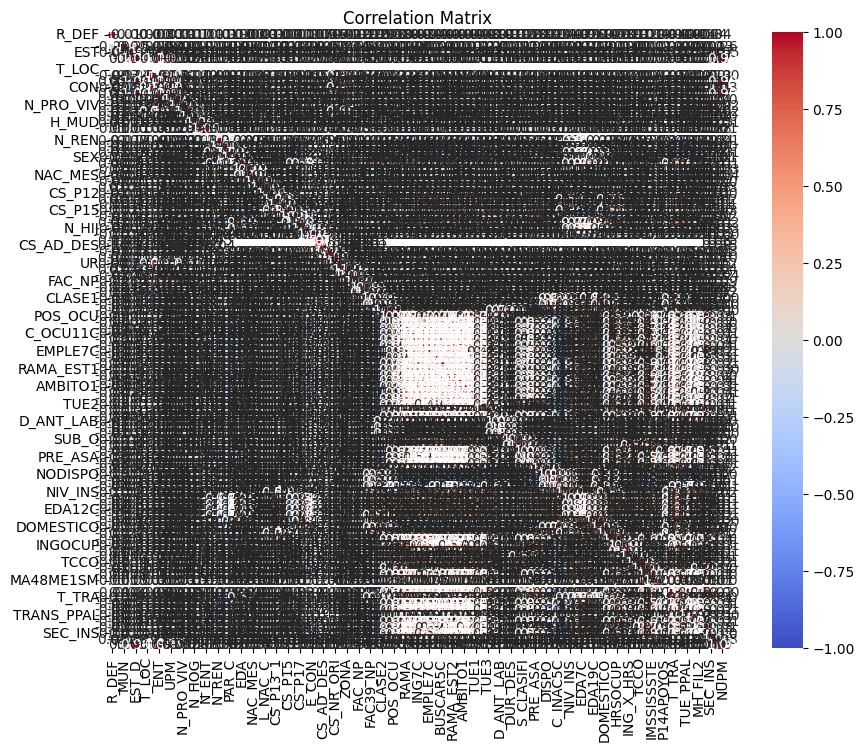

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

# Impute Null Values

In [3]:
from sklearn.impute import SimpleImputer

# Select only numeric columns and exclude those with 100% null values
numeric_columns = data.select_dtypes(include=["number"]).columns
columns_to_impute = [col for col in numeric_columns if data[col].notnull().any()]  # Exclude features that are totally null

# Impute null values for the selected numeric features
imputer = SimpleImputer(strategy="mean")
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# XGBoost Training for Feature Selection

      Feature  Importance
50    POS_OCU    0.394227
55      DUR9C    0.385359
68  D_ANT_LAB    0.081650
57   MEDICA5C    0.029537
73   REMUNE2C    0.017103
..        ...         ...
78   C_INAC5C    0.000000
17        PER    0.000000
83     EDA12C    0.000000
96  P14APOYOS    0.000000
0       R_DEF    0.000000

[107 rows x 2 columns]


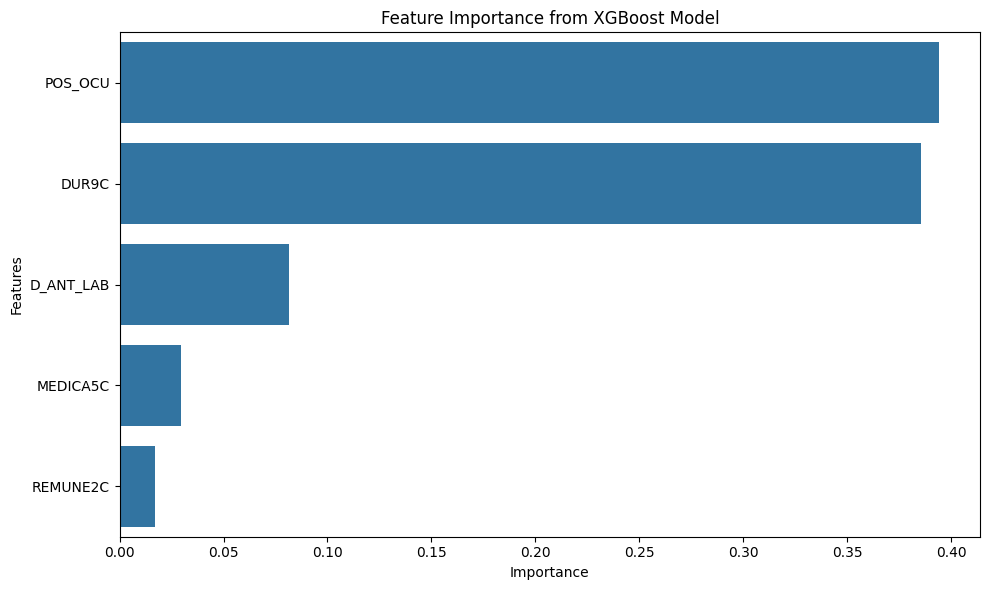

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

# Convert categorical columns of type 'object' to 'category'
categorical_cols = ["CS_P14_C", "CS_P20_DES", "CS_P22_DES"]
for col in categorical_cols:
    data[col] = data[col].astype("category")

X = data.drop(columns=["CLASE3"])
y = data["CLASE3"]

# Create XGBoost model with support for categorical data
model = XGBClassifier(enable_categorical=True)
model.fit(X, y)

# Features' importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
most_important = importance_df.sort_values(by="Importance", ascending=False)
print(most_important)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=most_important[0:5])
plt.title("Feature Importance from XGBoost Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Machine learning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create XGBoost model with support for categorical data
model = XGBClassifier(enable_categorical=True)

# Train the model with the training set
model.fit(X_train, y_train)

# Predicting with the test set
y_pred = model.predict(X_test)

# Mode evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Features' importance
feature_importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
print(importance_df.sort_values(by="Importance", ascending=False))


Accuracy: 0.9883000688231246
      Feature  Importance
50    POS_OCU    0.408909
55      DUR9C    0.340821
68  D_ANT_LAB    0.106986
57   MEDICA5C    0.031291
73   REMUNE2C    0.022331
..        ...         ...
84     EDA19C    0.000000
14      N_HOG    0.000000
17        PER    0.000000
96  P14APOYOS    0.000000
0       R_DEF    0.000000

[107 rows x 2 columns]
